
2017年度センタ＝試験　数学I・数学A　問題[3]
---
by ほげにむし


最大・最小値を求めるための方法をSymPyを使って理解しよう。

2017年1月に行われたセンター試験の問題を題材にする。
もしかしたらコンピュータに興味を持ってくれる高校生が増えるかもしれない。


問題
---

---

$a$を定数とし、$g(x)=x^2-2(3a^2+5a)x+18a^4+30a^3+49a^2+16$とおく。2次関数$y=g(x)$のグラフの頂点は
$$({\bf 【セ】}a^2+{\bf 【ソ】}a, {\bf 【タ】}a^4+{\bf 【チツ】}a^2+{\bf 【テト】})$$
である。

$a$が実数全体をうごくとき、頂点の$x$座標の最小値は$-\frac{{\bf 【ナニ】}}{{\bf 【ヌネ】}}$である。

次に$t=a^2$とおくと、頂点の$y$座標は
$$ 【タ】t^2+【チツ】t+【テト】$$
と表せる。したがって、$a$が実数全体を動くとき、頂点の$y$座標の最小値は${\bf 【ノハ】}$である。

---

こういった問題は数値演算では解きにくいので、数式の計算を記号で行うことのできるSymPyモジュールを使って解いていく。

まず、モジュールをインポートしよう。ついでに、プロットとプリティプリンティングの設定をしておく。

In [4]:
import sympy as sym
import sympy.plotting as splt
import seaborn as sns
%matplotlib inline
sym.init_printing()

関数$g(x)$を定義する。今回は$a$が定数と書いてあるが、実数全体で動かして考えるので、$a$も
変数とする。


In [5]:
x,a = sym.symbols('x a')
g=x**2 - 2*(3*a**2 + 5*a)*x + 18*a**4 + 30*a**3 + 49*a**2+16
g

aを変化させてグラフを書いて様子を見よう。試験ではこんなこと面倒でできないが・・・。

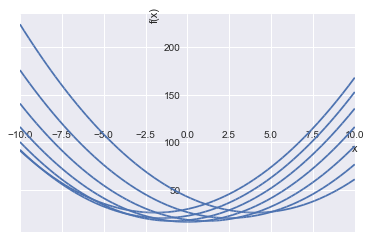

In [6]:
splt.plot(g.subs(a,-0.6),g.subs(a,-0.4),g.subs(a,-0.2),
    g.subs(a,0),g.subs(a,0.2),g.subs(a,0.4),g.subs(a,0.6))

極が動いているようである。


# 解１：微分を使って極を求める

ちょっとずるいが、微分を使って回答してみよう。

$g(x)$を微分してその$x$の値が0になる点が極であるので、これを求める。極を$(p_x, p_y)$とする。

In [7]:
dg=g.diff(x)
dg

この式$=0$とおいて、$x$について解く。

In [8]:
sym.solve(dg,x)

solveで求解すると一般に答えが複数出るので、配列で答えが返ってくる。xの一次式は一つしか解がないので、先頭の要素を選んでおこう。

In [9]:
px = sym.solve(dg,x)[0]
px

これを$g(x)$に代入すれば、極の$y$座標が求められる。

In [10]:
py=g.subs(x,px)
py

むむ、なんか複雑になってしまったぞ。expandで展開させて、様子を見よう。

In [11]:
px.expand(), py.expand()

お！これで解答欄をマークできそうである。

次は$x$の最小値だ。$x$の最小値は$p_x(a)$を$a$で偏微分すれば、求められる。

$p_x$を$a$で微分してその式が0となる$a$の値を$p_x$に代入する。$a$に関する2次式を見ているので、極は一つになるはずである。これを一行で書くとこうなる。

In [12]:
px.subs(a,sym.solve(px.diff(a))[0])

これも、マークできそうだ！

$y$の最小値についてはどうだろうか？
まず、問題通りに$t=a^2$として$t$の式に置き換えよう。

この時、直接は代入できないので、$a=\sqrt t$として代入する。

In [13]:
t=sym.symbols('t')
pyt=py.subs(a,sym.sqrt(t))
pyt.expand()

さて、極を求めればいいんだっけ？さっきの方法でもう一度求めよう。

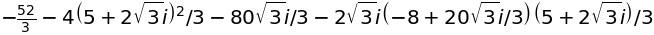

In [14]:
pyt.subs(t,sym.solve(pyt.diff(t))[0])

ちょｗｗｗｗ。expand()してみよう。前のセルの結果はアンダースコア"_"で参照できる。

In [15]:
_.expand()

シンプルになった・・・・・ってあれれれ、解答欄に収まらない。ちょっと極の$t$座標を確認してみよう。

In [16]:
sym.solve(pyt.diff(t))

ううむ。$a^2=t$としたので、$t$の定義域は$t\geq 0$だ。これではまずい。

概形を掴むために、グラフを描いてみよう。

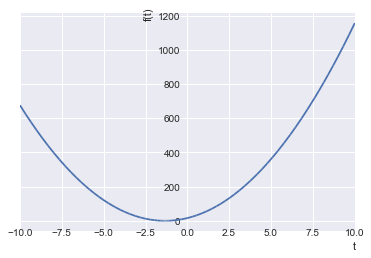

In [17]:
sym.plot(pyt)

極が原点の左側にあるので、$t=0$の時に最小値をとるようだ！計算してみよう。

In [18]:
pyt.subs(t,0)

でた！これで、解答欄にマークできそうだ。

# 解２：平行移動で極を求める

解１の方法は数学IAの範囲を超えるので、微分を使わずに解こう。

$f(x,y)=g(x)-y=0$とおいて、平行移動すれば、極を原点に持ってこれる。
その時の移動量がもとのグラフの極の座標だ。
極の座標を$(q_x, q_y)$としよう。$p$は解１で使ってしまったからだ。

$(q_x,q_y)$に極あるとすると、$f(x,y)$ を $(-q_x,-q_y)$ だけ平行移動すると、極が原点に移動する。
$f(x,y)$ を $(\alpha, \beta)$ だけ平行移動すると $f(x-\alpha,y-\beta)$ になる。

ここでは、$h(x,y)=f(x+q_x, y+q_y)$を考えていこう。

In [19]:
q_x,q_y = sym.symbols('q_x q_y')
y = sym.symbols('y')
f = g -y
h =f.subs(x,x+q_x).subs(y,y+q_y)
h

問題を$f(x,y)=0$を陰曲線プロットしてみよう。ひとまず、$a=0$とする。

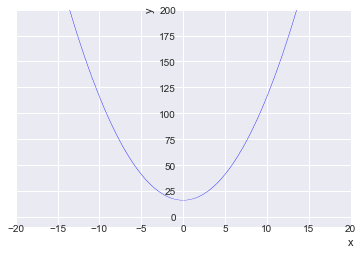

In [23]:
sym.plot_implicit(f.subs(a,0),(x, -20, 20), (y, -10, 200))

2次曲線としてplotされた。

さて、ここから$x$の1次の項を消して、標準形に持っていく。

SymPtには式を操作するためのいくつかの関数があるので、まずなれるために使ってみよう。

まずは、展開。

In [24]:
(x*(x-2)).expand(), ((x-5)**10).expand()

結構な無理ゲーもいけそうだ。

因数分解もできる。

In [25]:
(x**4 - 3*x**2 + 1).factor()

$x^n$に関する項を集めてくることもできる。結果は連想配列に入る。

In [26]:
col=h.expand().collect([x,y],evaluate=False)
col

これから、h(x,y)の$x$の項と定数項を消して、$h(x,y)=\lambda x^2$の標準形に持ってきたい。

連想配列にアクセスして項を取り出し、それらを$0$にする連立方程式を立てよう。
この連立方程式を$q_x$、$q_y$について解く。

In [27]:
sol=sym.solve([col[1],col[x]],[q_x,q_y])
sol

方程式を解く関数solveの解の組み合わせは、タプルのリストに入ってくる。タプルの中身をそれぞれにexpandをかけるため、
pythonのmap関数とtuple関数を使おう。

In [28]:
tuple(map(sym.expand,sol[0]))

これで、極が出た。

$x=3a^2+5a$の最小値については同じ平行移動の手順で、$y=9t^4+24t^2+16$の最小値は、原点の座標を代入することで
答えを求めることができる。

# まとめ

ここでは、2017年度センター試験数学IA問３を、SymPyを使って解く方法を示した。

SymPyのように、コンピュータで数式を記号演算する仕組みをcomputer algebra system (CAS)という。
高校の数学で出てくるたいていの計算問題は、このCASで解くことができる。

SymPy以外にも
- Mathematica
- Reduce
- Maxima
- Maple

などのソフトウェアがある。これらのソフトウェアは関数型言語が組み込まれていて、ちょっとマニアックであるが、
関数型言語は数学と相性がいい。興味があったら調べてみるとよいだろう。